# Quantum Computing and Graph Theory - Classical Implementation

In [2]:
# Setup

import numpy as np
import matplotlib.pyplot as plt
import math as m

### Graph Class Testing

In [3]:
from graph import Graph

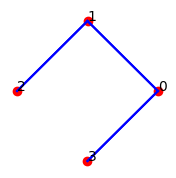

Bit string: 101100
Adjacency matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
Edge sequence (sum of rows): [2 2 1 1]
Connectivity sequence (upper-triangle binary string value): [5. 2. 0. 0.]


In [4]:

example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))


example_graph.plot_graph(vertex_labels=True)
print("Bit string:", example_graph.to_bitstring())
print("Adjacency matrix:\n", example_graph.adj_matrix)
print("Edge sequence (sum of rows):", example_graph.get_edge_sequence())
print("Connectivity sequence (upper-triangle binary string value):", example_graph.get_connectivity_sequence())

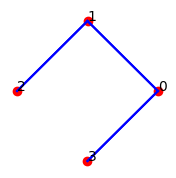

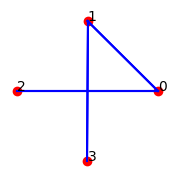

In [5]:
example_graph = Graph(np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 0, 0, 0],
]))

example_graph.plot_graph(vertex_labels=True)
example_graph.permute(2,3)
example_graph.plot_graph(vertex_labels=True)

#### Subgraph Search

Clique searching is an NP-Complete problem (Sipser).

As an extension of that idea, any subgraph search is similar to a clique search and is thus very likely also NP-Complete.

This algorithm is an initial attempt to explore this search in a classical manner


Inspired by a 2D convolution

In [7]:
# Subgraph searching

# Testing for a K-3 in a K-4 as an initial case
# Going to do so by counting the number of K-3's
# * The expected result for K-4 is C(4, 3) = 4
# * The expected result for K-5 is C(5, 3) = 10
# * The expected result for K-6 is C(6, 3) = 20

K_3 = Graph(np.array([
    [ 0, 1, 1 ],
    [ 1, 0, 1 ],
    [ 1, 1, 0 ],
]))

K_4 = Graph(np.array([
    [ 0, 1, 1, 1 ],
    [ 1, 0, 1, 1 ],
    [ 1, 1, 0, 1 ],
    [ 1, 1, 1, 0 ],
]))

K_5 = Graph(np.array([
    [ 0, 1, 1, 1, 1 ],
    [ 1, 0, 1, 1, 1 ],
    [ 1, 1, 0, 1, 1 ],
    [ 1, 1, 1, 0, 1 ],
    [ 1, 1, 1, 1, 0 ],
]))

K_6 = Graph(np.array([
    [ 0, 1, 1, 1, 1, 1 ],
    [ 1, 0, 1, 1, 1, 1 ],
    [ 1, 1, 0, 1, 1, 1 ],
    [ 1, 1, 1, 0, 1, 1 ],
    [ 1, 1, 1, 1, 0, 1 ],
    [ 1, 1, 1, 1, 1, 0 ],
]))

def count_subgraphs(graph: Graph, subgraph: Graph):

    for i in range(m.comb(graph.num_vertices, subgraph.num_vertices)):
        pass

    return 0

print("Subgraph Counts")
print(f" N | L | C(N, L) | counted ")
print(f" ------------------------- ")
print(f" {4} | {3} | {m.comb(4, 3)} | {count_subgraphs(K_4, K_3)} ")
print(f" {5} | {3} | {m.comb(5, 3)} | {count_subgraphs(K_5, K_3)} ")
print(f" {6} | {3} | {m.comb(6, 3)} | {count_subgraphs(K_6, K_3)} ")

assert(m.comb(4, 3) == count_subgraphs(K_4, K_3))
assert(m.comb(5, 3) == count_subgraphs(K_5, K_3))
assert(m.comb(6, 3) == count_subgraphs(K_6, K_3))

Subgraph Counts
 N | L | C(N, L) | counted 
 ------------------------- 
 4 | 3 | 4 | 0 
 5 | 3 | 10 | 0 
 6 | 3 | 20 | 0 


AssertionError: 

#### $\mathbb{H}$(3)

In [ ]:
H3 = [
    Graph(np.zeros((3, 3), dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0], [1, 0, 0], [0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1], [1, 0, 0], [1, 0, 0] ], dtype=np.uint8)),
    Graph(np.ones((3, 3), dtype=np.uint8))
]

for i, h in enumerate(H3):
    # h.plot_graph(vertex_labels=True)
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

0 000 [0 0 0] [0. 0. 0.] 0.0
1 100 [1 1 0] [2. 0. 0.] 2.0
2 110 [2 1 1] [3. 0. 0.] 3.0
3 111 [2 2 2] [3. 1. 0.] 4.0


#### $\mathbb{H}$(4)

i Bitstring Edge-Sequence Edge-Count Connectivity-Sequence Connectivity-Sum
0 000000 [0 0 0 0] 0.0 [0. 0. 0. 0.] 0.0
1 100000 [1 1 0 0] 1.0 [4. 0. 0. 0.] 4.0
2 110000 [2 1 0 0] 1.5 [6. 0. 0. 0.] 6.0
3 100001 [1 1 1 1] 2.0 [4. 0. 1. 0.] 5.0
4 101100 [2 2 1 1] 3.0 [5. 2. 0. 0.] 7.0
5 101010 [2 2 0 2] 3.0 [5. 1. 0. 0.] 6.0
6 111000 [3 1 1 1] 3.0 [7. 0. 0. 0.] 7.0
7 101110 [2 3 1 2] 4.0 [5. 3. 0. 0.] 8.0
8 101101 [2 2 2 2] 4.0 [5. 2. 1. 0.] 8.0
9 111011 [3 2 2 3] 5.0 [7. 1. 1. 0.] 9.0
10 111111 [3 3 3 3] 6.0 [7. 3. 1. 0.] 11.0


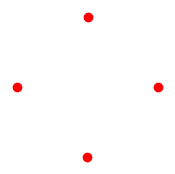

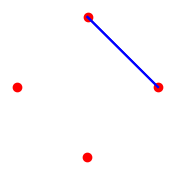

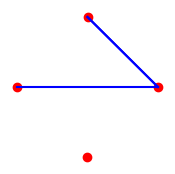

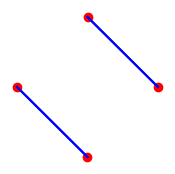

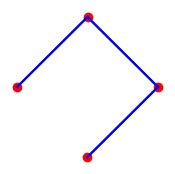

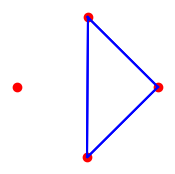

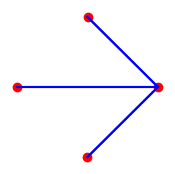

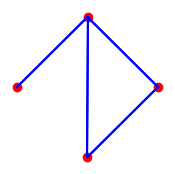

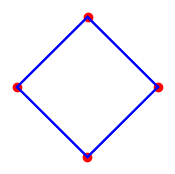

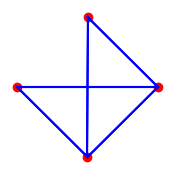

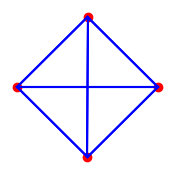

In [ ]:
H4 = [
    Graph(np.zeros((4, 4), dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 0], [1, 1, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0] ], dtype=np.uint8)),
    Graph(np.array([ [0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0] ], dtype=np.uint8)),
    Graph(np.ones((4, 4), dtype=np.uint8))
]

print("i", "Bitstring", "Edge-Sequence" ,"Edge-Count", "Connectivity-Sequence", "Connectivity-Sum")
for i, h in enumerate(H4):
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_edge_count(), h.get_connectivity_sequence(), np.sum(h.get_connectivity_sequence()))

for h in H4:
    h.plot_graph(vertex_labels=False)

### Generating the set of Non-Homomorphic Graphs of size $n$

In [ ]:
graph_size = 3

H = []
H.append(Graph(np.zeros((graph_size, graph_size), dtype=np.uint8))) # The empty graph
H.append(Graph(np.ones((graph_size, graph_size), dtype=np.uint8))) # The complete graph

for i, h in enumerate(H):
    print(i, h.to_bitstring(), h.get_edge_sequence(), h.get_connectivity_sequence())


0 000 [0 0 0] [0. 0. 0.]
1 111 [2 2 2] [3. 1. 0.]
